# Importing necessary Libraries to proceeed further.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('Happiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


As we can see columns like Country, Region, Happiness rank and Standard Error are not contributing much to the dataset. Hence, removing these columns.

In [56]:
df.drop(['Country','Region','Happiness Rank','Standard Error'],axis=1,inplace=True)
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We need to remove dystopia Residual as its not contributing much to the dataset.

In [59]:
df.drop('Dystopia Residual',axis=1,inplace=True)

In [60]:
df.shape

(158, 7)

We have 158 rows and 7 columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


We have float datatype in all the columns

In [63]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


Happiness Score
0.0968384478392508


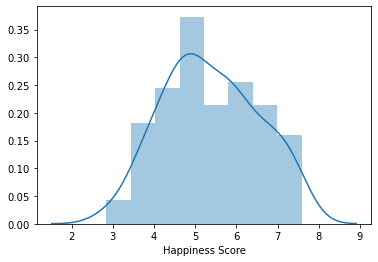

Economy (GDP per Capita)
-0.31455171687947087


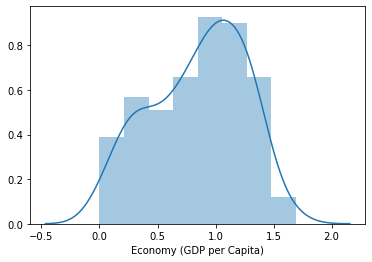

Family
-0.9973086936977792


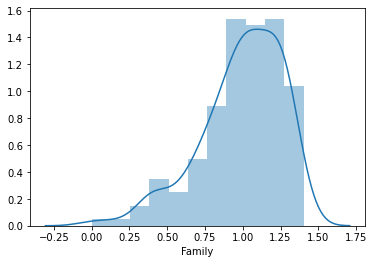

Health (Life Expectancy)
-0.69861459190758


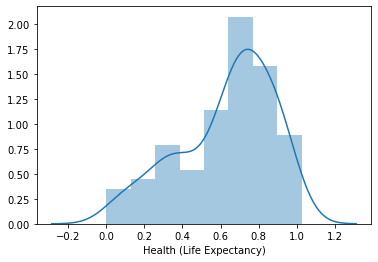

Freedom
-0.40952630345169977


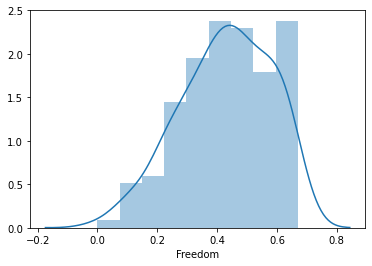

Trust (Government Corruption)
1.3722746285872591


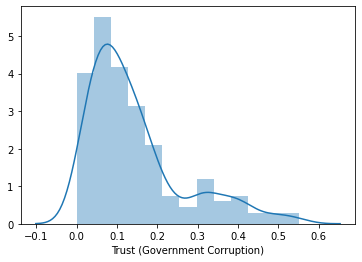

Generosity
0.9924230947758468


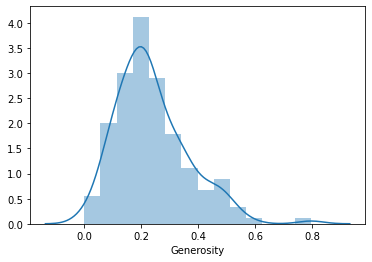

In [64]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

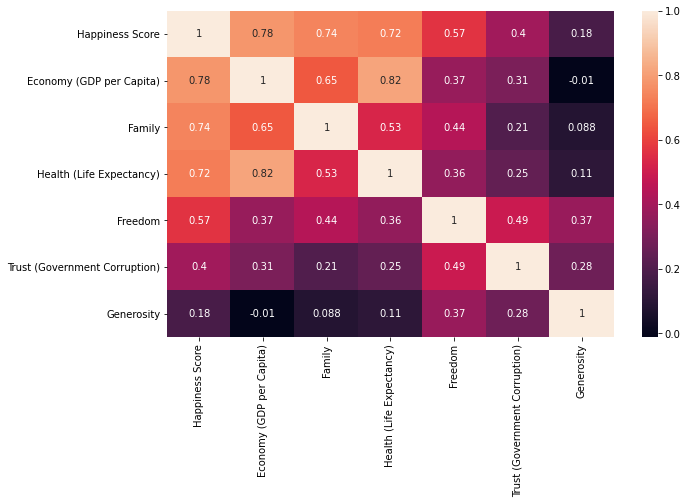

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see the feature 'Generosity','Trust (Government Corruption)' has least correlation with Target variable. Hence, we should remove the skewness from these two columns

In [73]:
df['Generosity'] = np.sqrt(df['Generosity'])
df['Trust (Government Corruption)'] = np.sqrt(df['Trust (Government Corruption)'])

In [74]:
skew(df['Generosity'])

-0.12971454872130658

In [75]:
skew(df['Trust (Government Corruption)'])

0.502830818389149

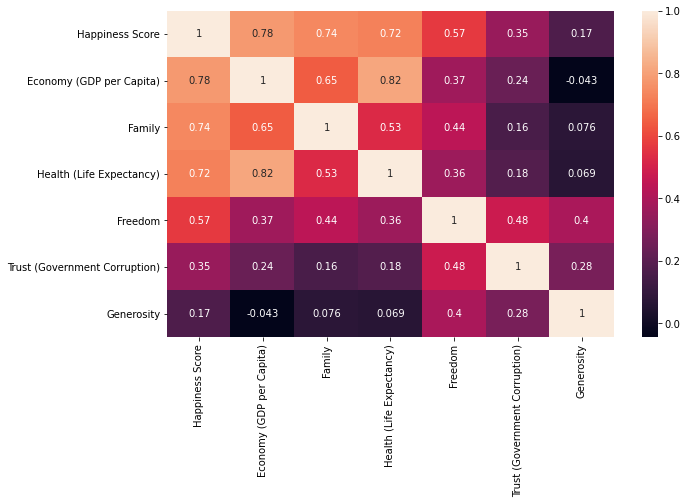

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

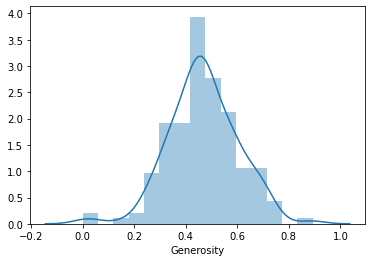

In [77]:
sns.distplot(df['Generosity'])
plt.show()

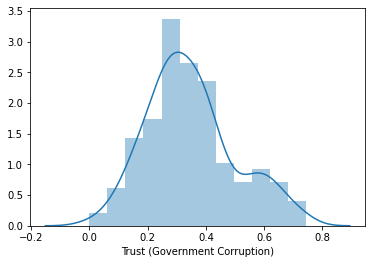

In [78]:
sns.distplot(df['Trust (Government Corruption)'])
plt.show()

In [88]:
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

In [93]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [94]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.826132,0.962403,0.918244,0.993789,0.872121,0.610652
1,0.770412,1.000000,0.924496,0.938841,0.506253,0.740404
2,0.784113,0.970297,0.853099,0.969615,0.936042,0.654940
3,0.863099,0.949167,0.863409,1.000000,0.813261,0.660290
4,0.784592,0.943219,0.883326,0.945112,0.772751,0.758684
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.533211
154,0.169573,0.252355,0.311241,0.723426,0.380962,0.478990
155,0.392329,0.338668,0.704150,0.234184,0.585283,0.769929
156,0.009051,0.296578,0.218444,0.176937,0.426980,0.497859


In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [100]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [102]:
print(f"Regression R2: {LR.score(x_test,y_test)}")

Regression R2: 0.7370013662529666
